### Name : Anvay Tere 
### College : DJ , Mumbai University

# Import The Required Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import warnings
import os
import codecs
%matplotlib inline

warnings.filterwarnings('ignore')

# Loding the Data set into Pandas DataFrames

In [14]:

    df = pd.read_csv(r"C:\Users\anvay\OneDrive\Desktop\sentiment_twitter.csv" , encoding = 'ISO-8859-1')

    



# Pre-Processing of the Data

In [15]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [16]:
column_names = ['Target' , '  Id' , 'Date' , 'Flags' ,'User', 'Text']
df.columns = column_names

In [17]:
df.head()

,Target,Id,Date,Flags,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1048575 non-null  int64 
 1     Id    1048575 non-null  int64 
 2   Date    1048575 non-null  object
 3   Flags   1048575 non-null  object
 4   User    1048575 non-null  object
 5   Text    1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [29]:
# Removes pattern in the input text 
def remove_existing_pattern(input_txt , pattern):
    r = re.findall(pattern , input_txt)
    for word in r:
        input_txt = re.sub(word , "" , input_txt)
    return input_txt    
        

In [28]:
# Clean the tweet 
df['clean_tweet'] = np.vectorize(remove_existing_pattern)(df['Text'], "@[\w]*")

In [21]:
df.head()

,Target,Id,Date,Flags,User,Text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [22]:
# Removing all the special characters numbers and puncuations excluding the hash
df['clean_tweet'] = df['clean_tweet'] .str.replace("[^a-zA-Z# ]", " ")

In [23]:
df.head()

,Target,Id,Date,Flags,User,Text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [24]:
# Removes all the short words 
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [25]:
df.head()

,Target,Id,Date,Flags,User,Text,clean_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving here because over there
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [26]:
# Now considering indivisual words as tokens
tokens_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokens_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [32]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokens_tweet = tokens_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokens_tweet.tail()

1048570                        [grandma, make, dinenr, with]
1048571               [morn, snack, time, bowl, chee, noodl]
1048572    [same, here, like, from, termini, movi, come, ...
1048573                                [great, thaank, wbuu]
1048574                     [cant, wait, date, thi, weekend]
Name: clean_tweet, dtype: object

In [33]:
tokens_tweet.tail()

1048570                        [grandma, make, dinenr, with]
1048571               [morn, snack, time, bowl, chee, noodl]
1048572    [same, here, like, from, termini, movi, come, ...
1048573                                [great, thaank, wbuu]
1048574                     [cant, wait, date, thi, weekend]
Name: clean_tweet, dtype: object

# Exploratory Data Analysis

###  Now we are visualizing the frequent words

In [34]:

all_words = " ".join([sentence for sentence in df['clean_tweet']])

In [37]:
from wordcloud import WordCloud




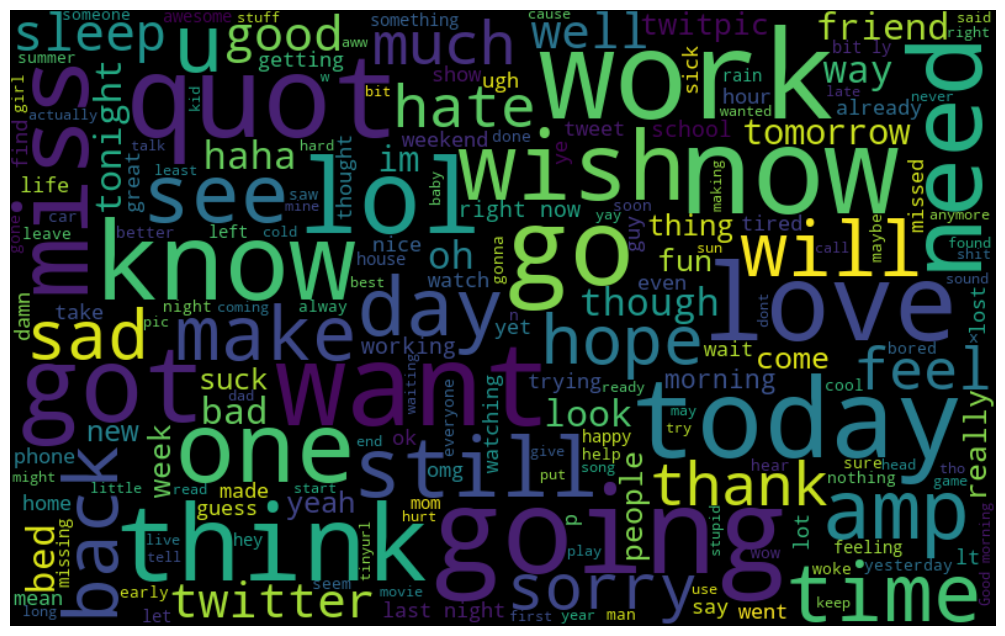

In [40]:
wordcloud = WordCloud(width = 800 , height = 500 , random_state=42 , max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud , interpolation ='bilinear')
plt.axis('off')
plt.show()

### Now we will visualize the positive words 

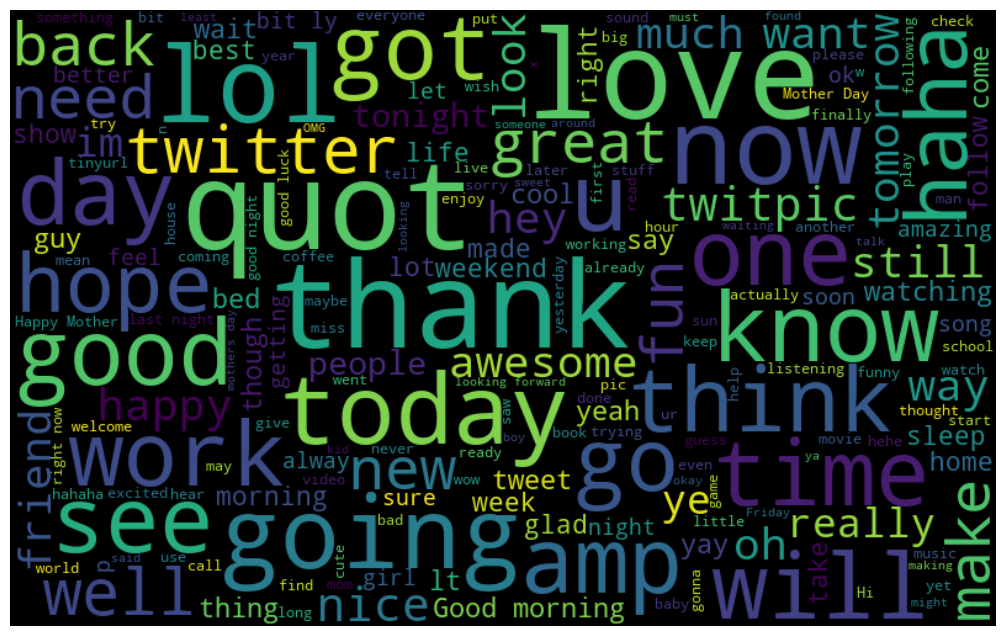

In [42]:

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Target']==4]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500 , random_state=42 , max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud , interpolation ='bilinear')
plt.axis('off')
plt.show()

### Now we are visaulizing the negative words

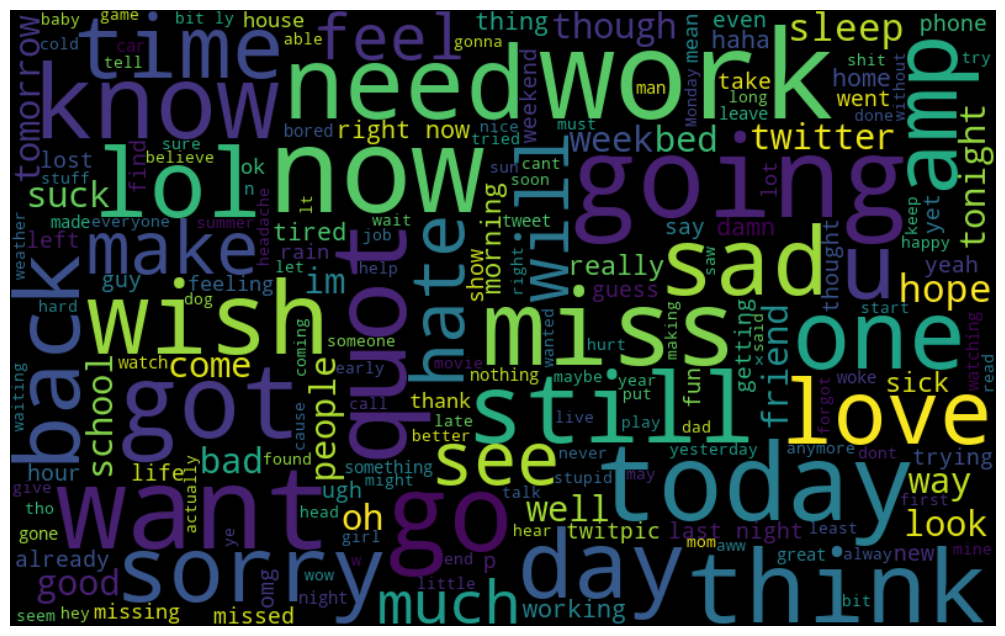

In [45]:

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Target']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800 , height = 500 , random_state=42 , max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud , interpolation ='bilinear')
plt.axis('off')
plt.show()

### Now we are extracting the hashtag

In [61]:
def hash_tag (tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [62]:
ht_positive = hash_tag(df['clean_tweet'][df['Target']==4])
                     
ht_negative = hash_tag(df['clean_tweet'][df['Target']==0])

In [67]:
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative, [])

In [68]:
ht_positive[:5]

['Devunity', 'Alexa', 'Japan', 'Skype', 'expletives']

In [69]:
ht_negative[:6]

['itm', 'therapyfail', 'fb', 'TTSC', '24', 'gayforpeavy']

In [70]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag' : list(freq.keys()),
                  'Count':list(freq.values())
    
})
d.head()

,Hashtag,Count
0,Devunity,1
1,Alexa,1
2,Japan,3
3,Skype,2
4,expletives,1


### Now selecting the top 10 hashtags

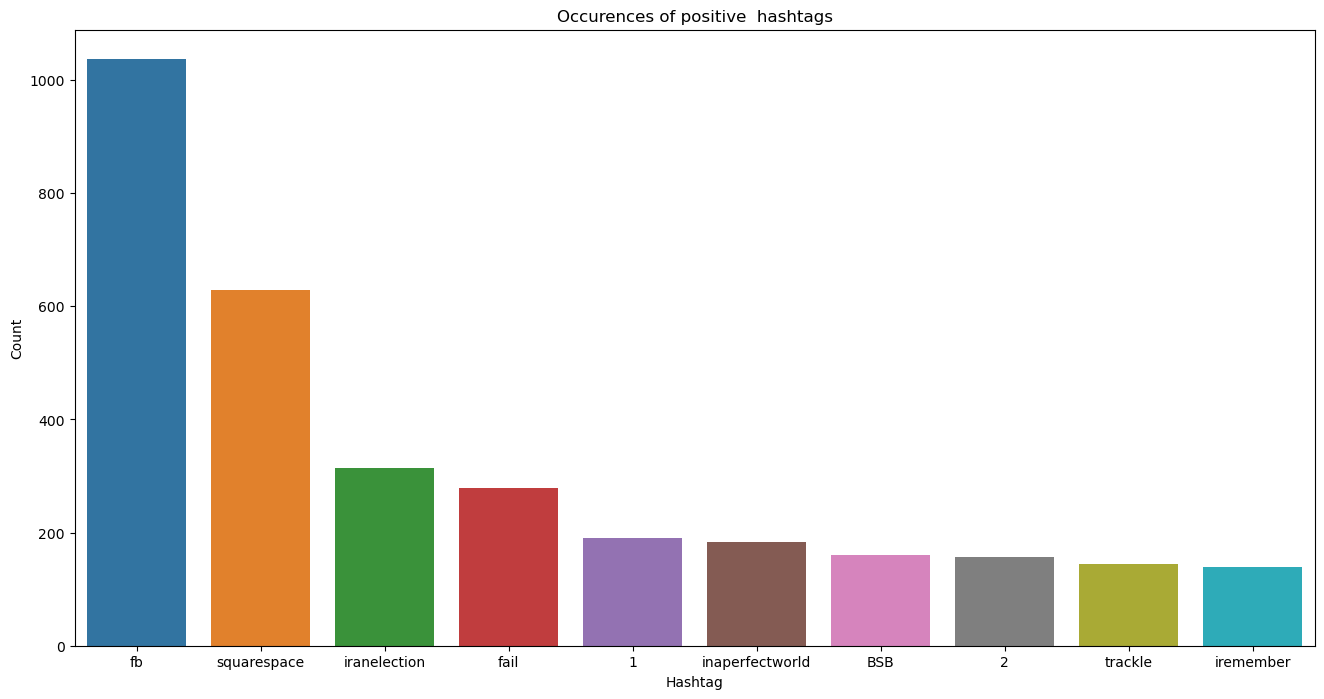

In [78]:
d= d.nlargest(columns = 'Count',n=10)
plt.figure(figsize=(16,8))
chart = sns.barplot(data=d , x='Hashtag', y ='Count')
chart.set_title('Occurences of positive  hashtags')
plt.show()

In [74]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag' : list(freq.keys()),
                  'Count':list(freq.values())
    
})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,fb,1037
3,TTSC,1
4,24,11


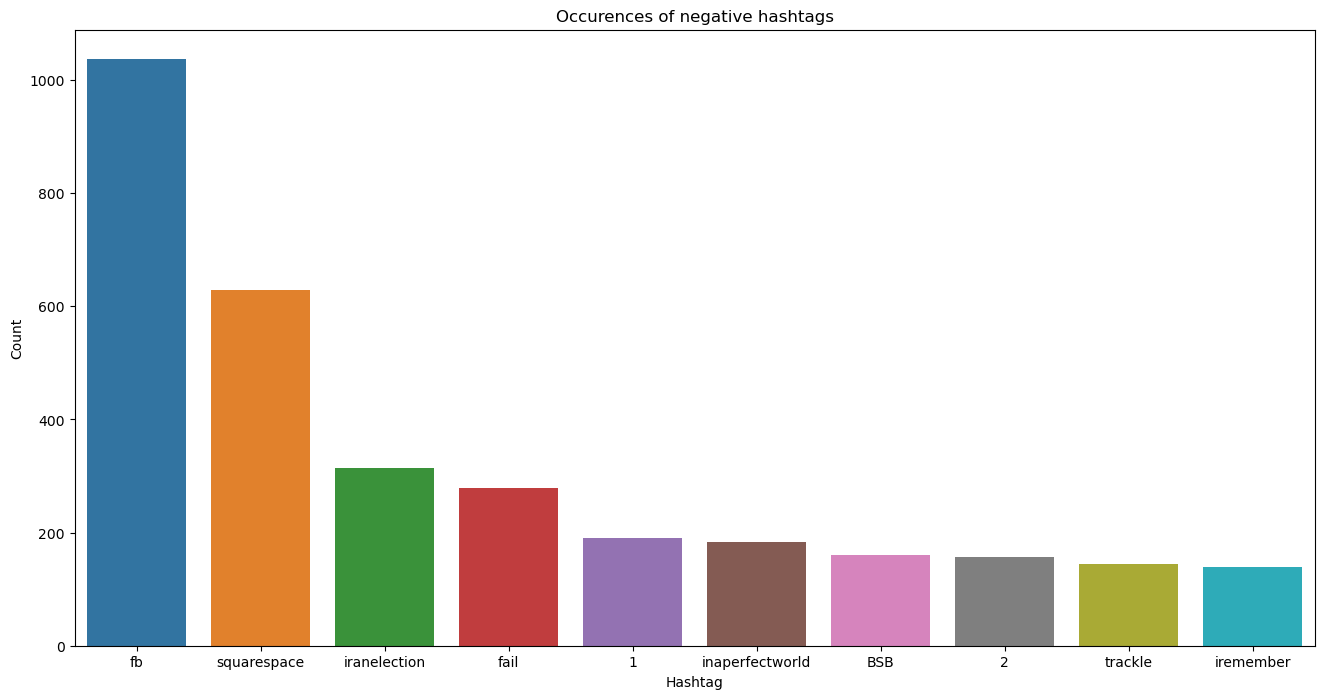

In [77]:
d= d.nlargest(columns = 'Count',n=10)
plt.figure(figsize=(16,8))
chart = sns.barplot(data=d , x='Hashtag', y ='Count')
chart.set_title('Occurences of negative hashtags')
plt.show()

# Input Split

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90 , min_df = 2 , max_features=1000 , stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [89]:
df['clean_tweet']

0          is upset that he can't update his Facebook by ...
1           I dived many times for the ball. Managed to s...
2            my whole body feels itchy and like its on fire 
3           no, it's not behaving at all. i'm mad. why am...
4                                        not the whole crew 
                                 ...                        
1048570             My GrandMa is making Dinenr with my Mum 
1048571    Mid-morning snack time... A bowl of cheese noo...
1048572     same here  say it like from the Terminiator m...
1048573                              im great thaanks  wbuu?
1048574                 cant wait til her date this weekend 
Name: clean_tweet, Length: 1048575, dtype: object

In [82]:
#bow[0].toarray()

In [84]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(bow , df['Target'], random_state=42 , test_size = 0.30)

# Model Trainning

### Using Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score , accuracy_score , confusion_matrix, ConfusionMatrixDisplay

In [87]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [98]:
pred = model.predict(x_test)

In [99]:
accuracy_score (y_test , pred)

0.8099328295816869

In [95]:
model.classes_

array([0, 4], dtype=int64)

In [100]:
cm = confusion_matrix(y_test ,pred , labels = model.classes_)

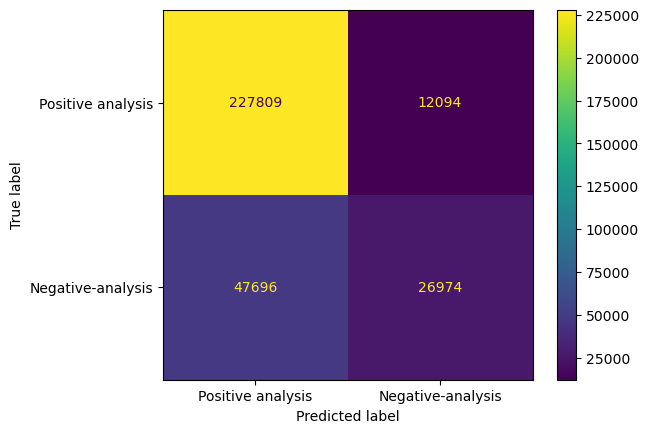

In [102]:
cm_dis = ConfusionMatrixDisplay( confusion_matrix = cm , display_labels = ['Positive analysis' , 'Negative-analysis'])
cm_dis.plot()